In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
import scipy.special as sc
from scipy.stats import norm
import seaborn as sns
import pandas as pd

In [16]:
def weib_cdf(x,alpha,gamma):
    return (1 - np.exp(-np.power(x/alpha,gamma)))

bound_is=75000
# bound_is=750000 #ASHWARIA

In [17]:
temp = np.array([ 421.,  424.,  429.,  484.,  525.,  532.,  533.,  606.,  658.,
        688.,  692.,  697.,  749.,  833.,  834.,  838.,  911.,  929.,
        962., 1117., 1131., 1223., 1356., 1360., 1457., 1722., 1824.,
       2238., 2298., 2327.])

In [18]:
temp.size

30

In [19]:
'''K-M estimator'''
n_est=np.asarray(range(temp.size))[::-1] + 1  #array from 29 to 0
print(n_est)

[30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1]


In [20]:
n_est=np.asarray(range(temp.size))[::-1]+1
print(n_est)
RT_sync=[]
for i in range(n_est.size):
    print((n_est[i]-1),n_est[i])
    if len(RT_sync)==0:
        RT_sync.append((n_est[i]-1)/n_est[i])
    else:
        RT_sync.append(RT_sync[-1]*((n_est[i]-1)/n_est[i]))
F=1-np.asarray(RT_sync).reshape(-1,1)

[30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1]
29 30
28 29
27 28
26 27
25 26
24 25
23 24
22 23
21 22
20 21
19 20
18 19
17 18
16 17
15 16
14 15
13 14
12 13
11 12
10 11
9 10
8 9
7 8
6 7
5 6
4 5
3 4
2 3
1 2
0 1


alpha:1046.3256814655495, gamma:2.05730904435154


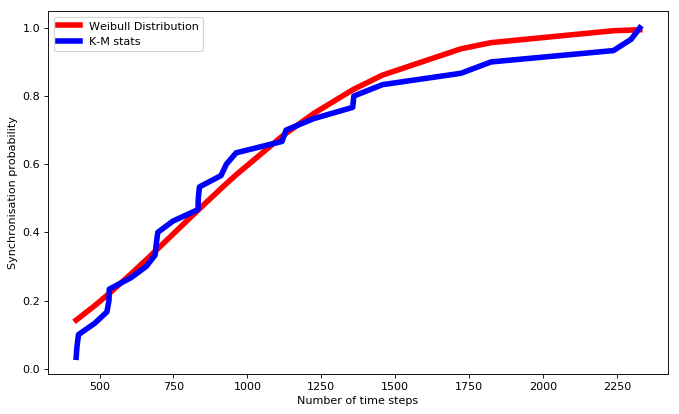

In [21]:
#popt_weibull[0] is alpha
#popt_weibull[1] is gamma
popt_weibull,_= curve_fit(weib_cdf,xdata=temp,ydata=np.squeeze(F),bounds=(0,[bound_is,10]),method='trf')
print("alpha:%s, gamma:%s" % (popt_weibull[0],popt_weibull[1]))


fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
y_weib=weib_cdf(temp,popt_weibull[0],popt_weibull[1])
plt.plot(temp,y_weib,'r',linewidth=5,label="Weibull Distribution")
plt.plot(temp,F,'b',linewidth=5,label="K-M stats")
#plt.ylim(0,1)
plt.legend()
plt.xlabel("Number of time steps")
plt.ylabel("Synchronisation probability")
plt.show();

# Adding 0 at time 0.0

In [22]:
temp1 = np.array([ 0., 421.,  424.,  429.,  484.,  525.,  532.,  533.,  606.,  658.,
        688.,  692.,  697.,  749.,  833.,  834.,  838.,  911.,  929.,
        962., 1117., 1131., 1223., 1356., 1360., 1457., 1722., 1824.,
       2238., 2298., 2327.])

In [23]:
F1 = np.array([0., 0.03333333, 0.06666667, 0.1       , 0.13333333, 0.16666667,
       0.2       , 0.23333333, 0.26666667, 0.3       , 0.33333333,
       0.36666667, 0.4       , 0.43333333, 0.46666667, 0.5       ,
       0.53333333, 0.56666667, 0.6       , 0.63333333, 0.66666667,
       0.7       , 0.73333333, 0.76666667, 0.8       , 0.83333333,
       0.86666667, 0.9       , 0.93333333, 0.96666667, 1.        ])

alpha:1046.3256808091287, gamma:2.057309044936719


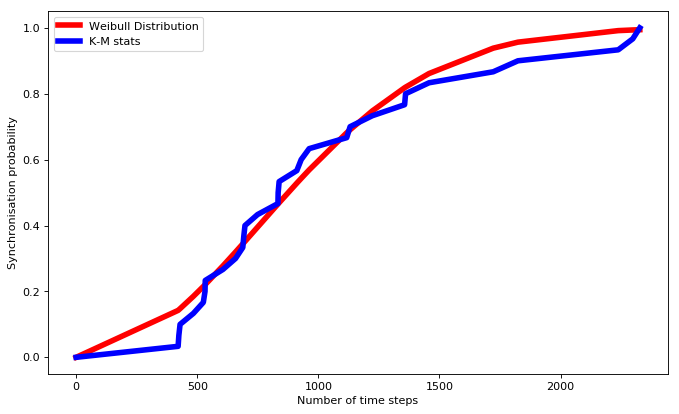

In [24]:
#popt_weibull[0] is alpha
#popt_weibull[1] is gamma
popt_weibull,_= curve_fit(weib_cdf,xdata=temp1,ydata=np.squeeze(F1),bounds=(0,[bound_is,10]),method='trf')
print("alpha:%s, gamma:%s" % (popt_weibull[0],popt_weibull[1]))


fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
y_weib=weib_cdf(temp1,popt_weibull[0],popt_weibull[1])
plt.plot(temp1,y_weib,'r',linewidth=5,label="Weibull Distribution")
plt.plot(temp1,F1,'b',linewidth=5,label="K-M stats")
#plt.ylim(0,1)
plt.legend()
plt.xlabel("Number of time steps")
plt.ylabel("Synchronisation probability")
plt.show();

In [ ]:
#WARNING : temp proviene dal K-M estimator, dai un nome più consono a temp
# TODO: Il total_dict non lo usi per nulla, cancellare
mean_fpt_dict = dict()
convergence_time_dict = dict()

for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]
            if(num_robots not in mean_fpt_dict):
                mean_fpt_dict[num_robots]=dict()
                convergence_time_dict[num_robots]=dict()

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])

#     print(str(count) + " : " + dirName)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue
    rho_str=str(rho)
    alpha_str=str(alpha)
#     print("rho", rho_str)
#     print("alpha", alpha_str)
    if(rho_str not in mean_fpt_dict[num_robots]):
        mean_fpt_dict[num_robots][rho_str]=dict()
        convergence_time_dict[num_robots][rho_str]=dict()
#         print(total_dict)
    #WARNING : di mettere alpha probabilmente non ce n'è bisogno
#     if(alpha_str not in total_dict[num_robots][rho_str]):
#         total_dict[num_robots][rho_str][alpha_str]=dict()
#         mean_fpt_dict[num_robots][rho_str][alpha_str]=dict()
#         convergence_time_dict[num_robots][rho_str][alpha_str]=dict()

    #df = pd.DataFrame()
    number_of_experiments = 0
    df = pd.DataFrame()
    conv_time_batch = np.array([])
    for file in fileList:
        if file.endswith('time_results.tsv'):
#             print(mean_wmsd)
#             print('Directory %s' % dirName)
#             print('\t\tfile %s' % file)
        
            df_single = pd.read_csv(dirName+"/"+file, sep="\t")
            df = df.append(df_single)
            number_of_experiments +=1
            
            '''Variable for Conv Time'''
            times = df_single.values[:,1:]
            conv_times = np.zeros(times.shape[0])
            print("Time shape", times.shape)
            for idx, elem in enumerate(times):
                if(elem[0] == 0):
                    conv_times[idx] = elem[1]
                else:
                    conv_times[idx] = elem.min()
            #c_time in ticks 
            conv_time_batch = np.append(conv_time_batch, conv_times.max()) 
         
        #WARNING : le tre righe seguenti le ho scommentate, attenzione
            c_time_max_val = conv_times.max()
        #     print("Convergence time:", c_time_max_val)
            convergence_time_dict[num_robots][rho_str][alpha_str]= c_time_max_val
            
#     print(conv_time_batch.size)            


    
  
    '''Weibull distribution for Convergence Time'''
    figPath = results_dir+'/'+"conv_time_alpha_%s_rho_%s.png" % (alpha_str, rho_str) 
    figLabel = "Convergence Time alpha:%s, rho:%s.png" % (alpha_str, rho_str)
    censored = 1
#     bound_is=7500
    temp = conv_time_batch.reshape(-1)
    print("Temp1 size: ", temp.size)
    print("Temp", temp)
    print()
    temp = temp[np.argsort(temp)]
    print("Temp2 size: ", temp.size)
    print("Temp", temp)
   
    
#     data = df.values
#     #print(data) 
    
#     ''' Weibull distribution for First Passage Time'''
#     figPath = results_dir+'/'+"fpt_alpha_%s_rho_%s.png" % (alpha_str, rho_str)
#     figLabel = "fpt alpha:%s, rho:%s.png" % (alpha_str, rho_str)
#     fpt = data[:,1:2]
#     censored = fpt.size - np.count_nonzero(fpt)
# #     print(fpt.size, censored)
#     temp = fpt.reshape(-1)
#     #print(temp)
#     temp = temp[np.argsort(temp)]
#     #print(temp.size)
#     temp = temp[censored:]
#     #print(temp.size)


    '''K-M estimator'''
    n_est=np.asarray(range(0,temp.size))[::-1] + censored  #array from 29 to 0
    RT_sync=[]
    for i in range(n_est.size):
        if len(RT_sync)==0:
            RT_sync.append((n_est[i]-1)/n_est[i])
        else:
            RT_sync.append(RT_sync[-1]*((n_est[i]-1)/n_est[i]))
#     print(RT_sync)
    F=1-np.asarray(RT_sync).reshape(-1,1)
#     print(F)
    #popt_weibull[0] is alpha
    #popt_weibull[1] is gamma
    
    
    
    popt_weibull,_= curve_fit(weib_cdf,xdata=temp,ydata=np.squeeze(F),bounds=(0,[bound_is,10]),method='trf')
    mean = sc.gamma(1+(1./popt_weibull[1]))*popt_weibull[0]
    mean_fpt_dict[num_robots][rho_str][alpha_str] = mean
#     print("mean",mean)
    std_dev = np.sqrt(popt_weibull[0]**2 * sc.gamma(1+(2./popt_weibull[1])) - mean**2)
    
    #fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

    '''Textbox with mu and sigma'''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mean, ),
        r'$\sigma=%.2f$' % (std_dev, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)


    y_weib=weib_cdf(temp,popt_weibull[0],popt_weibull[1])
    error_weib=np.power(y_weib-np.squeeze(F),2)
    plt.plot(temp,y_weib,'r',linewidth=5,label="Weibull Distribution")
    plt.plot(temp,F,'b',linewidth=5,label="K-M stats")
    plt.legend(loc=4)
    plt.ylim(0,1)
    #label="Alpha "+str(dataset[sample,1])+" Rho "+str(dataset[sample,2])+" Time of First Passage for "+str(censored)+"/"+str(uncensored)+" censored values"
    label = figLabel
    plt.title(label)
    plt.xlabel("Number of time steps")
    plt.ylabel("Synchronisation probability")
#     plt.show()
    plt.savefig(figPath)
    plt.close(fig)